### Fraud_check dataset

In [1]:
#importing required libraries
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
#readng the data
fraud=pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#to know the datatypes of the column
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
#label encoding the data
label_encoder=preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])

In [5]:
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])

In [6]:
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

In [7]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [8]:
#for duplicate values
fraud.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

### Visualization of data

C:\Users\pabba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pabba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pabba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

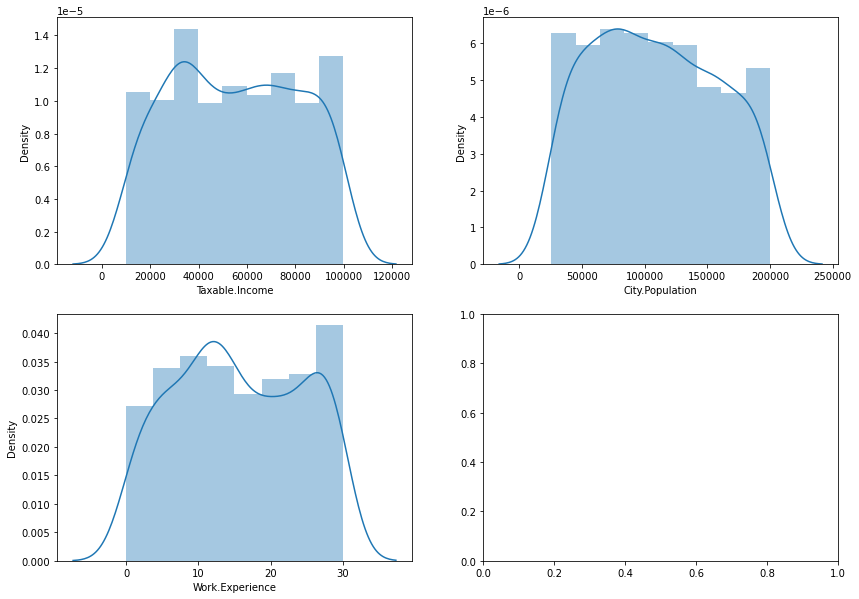

In [9]:
#using distplot
import seaborn as sns
fig,ax=plt.subplots(2,2 ,figsize=(14,10))
sns.distplot(fraud['Taxable.Income'], ax=ax[0,0])
sns.distplot(fraud['City.Population'],ax=ax[0,1])
sns.distplot(fraud['Work.Experience'],ax=ax[1,0])



In [10]:
fraud['Taxable.Income']=(fraud['Taxable.Income']>30000)*1

In [11]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [12]:
#assigning input and output variables
x=fraud.drop(axis=1, columns='Taxable.Income')
y=fraud['Taxable.Income']

In [13]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int32

In [15]:
#trainng and testing the data
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [16]:
#building a model
# using entropy criteria

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

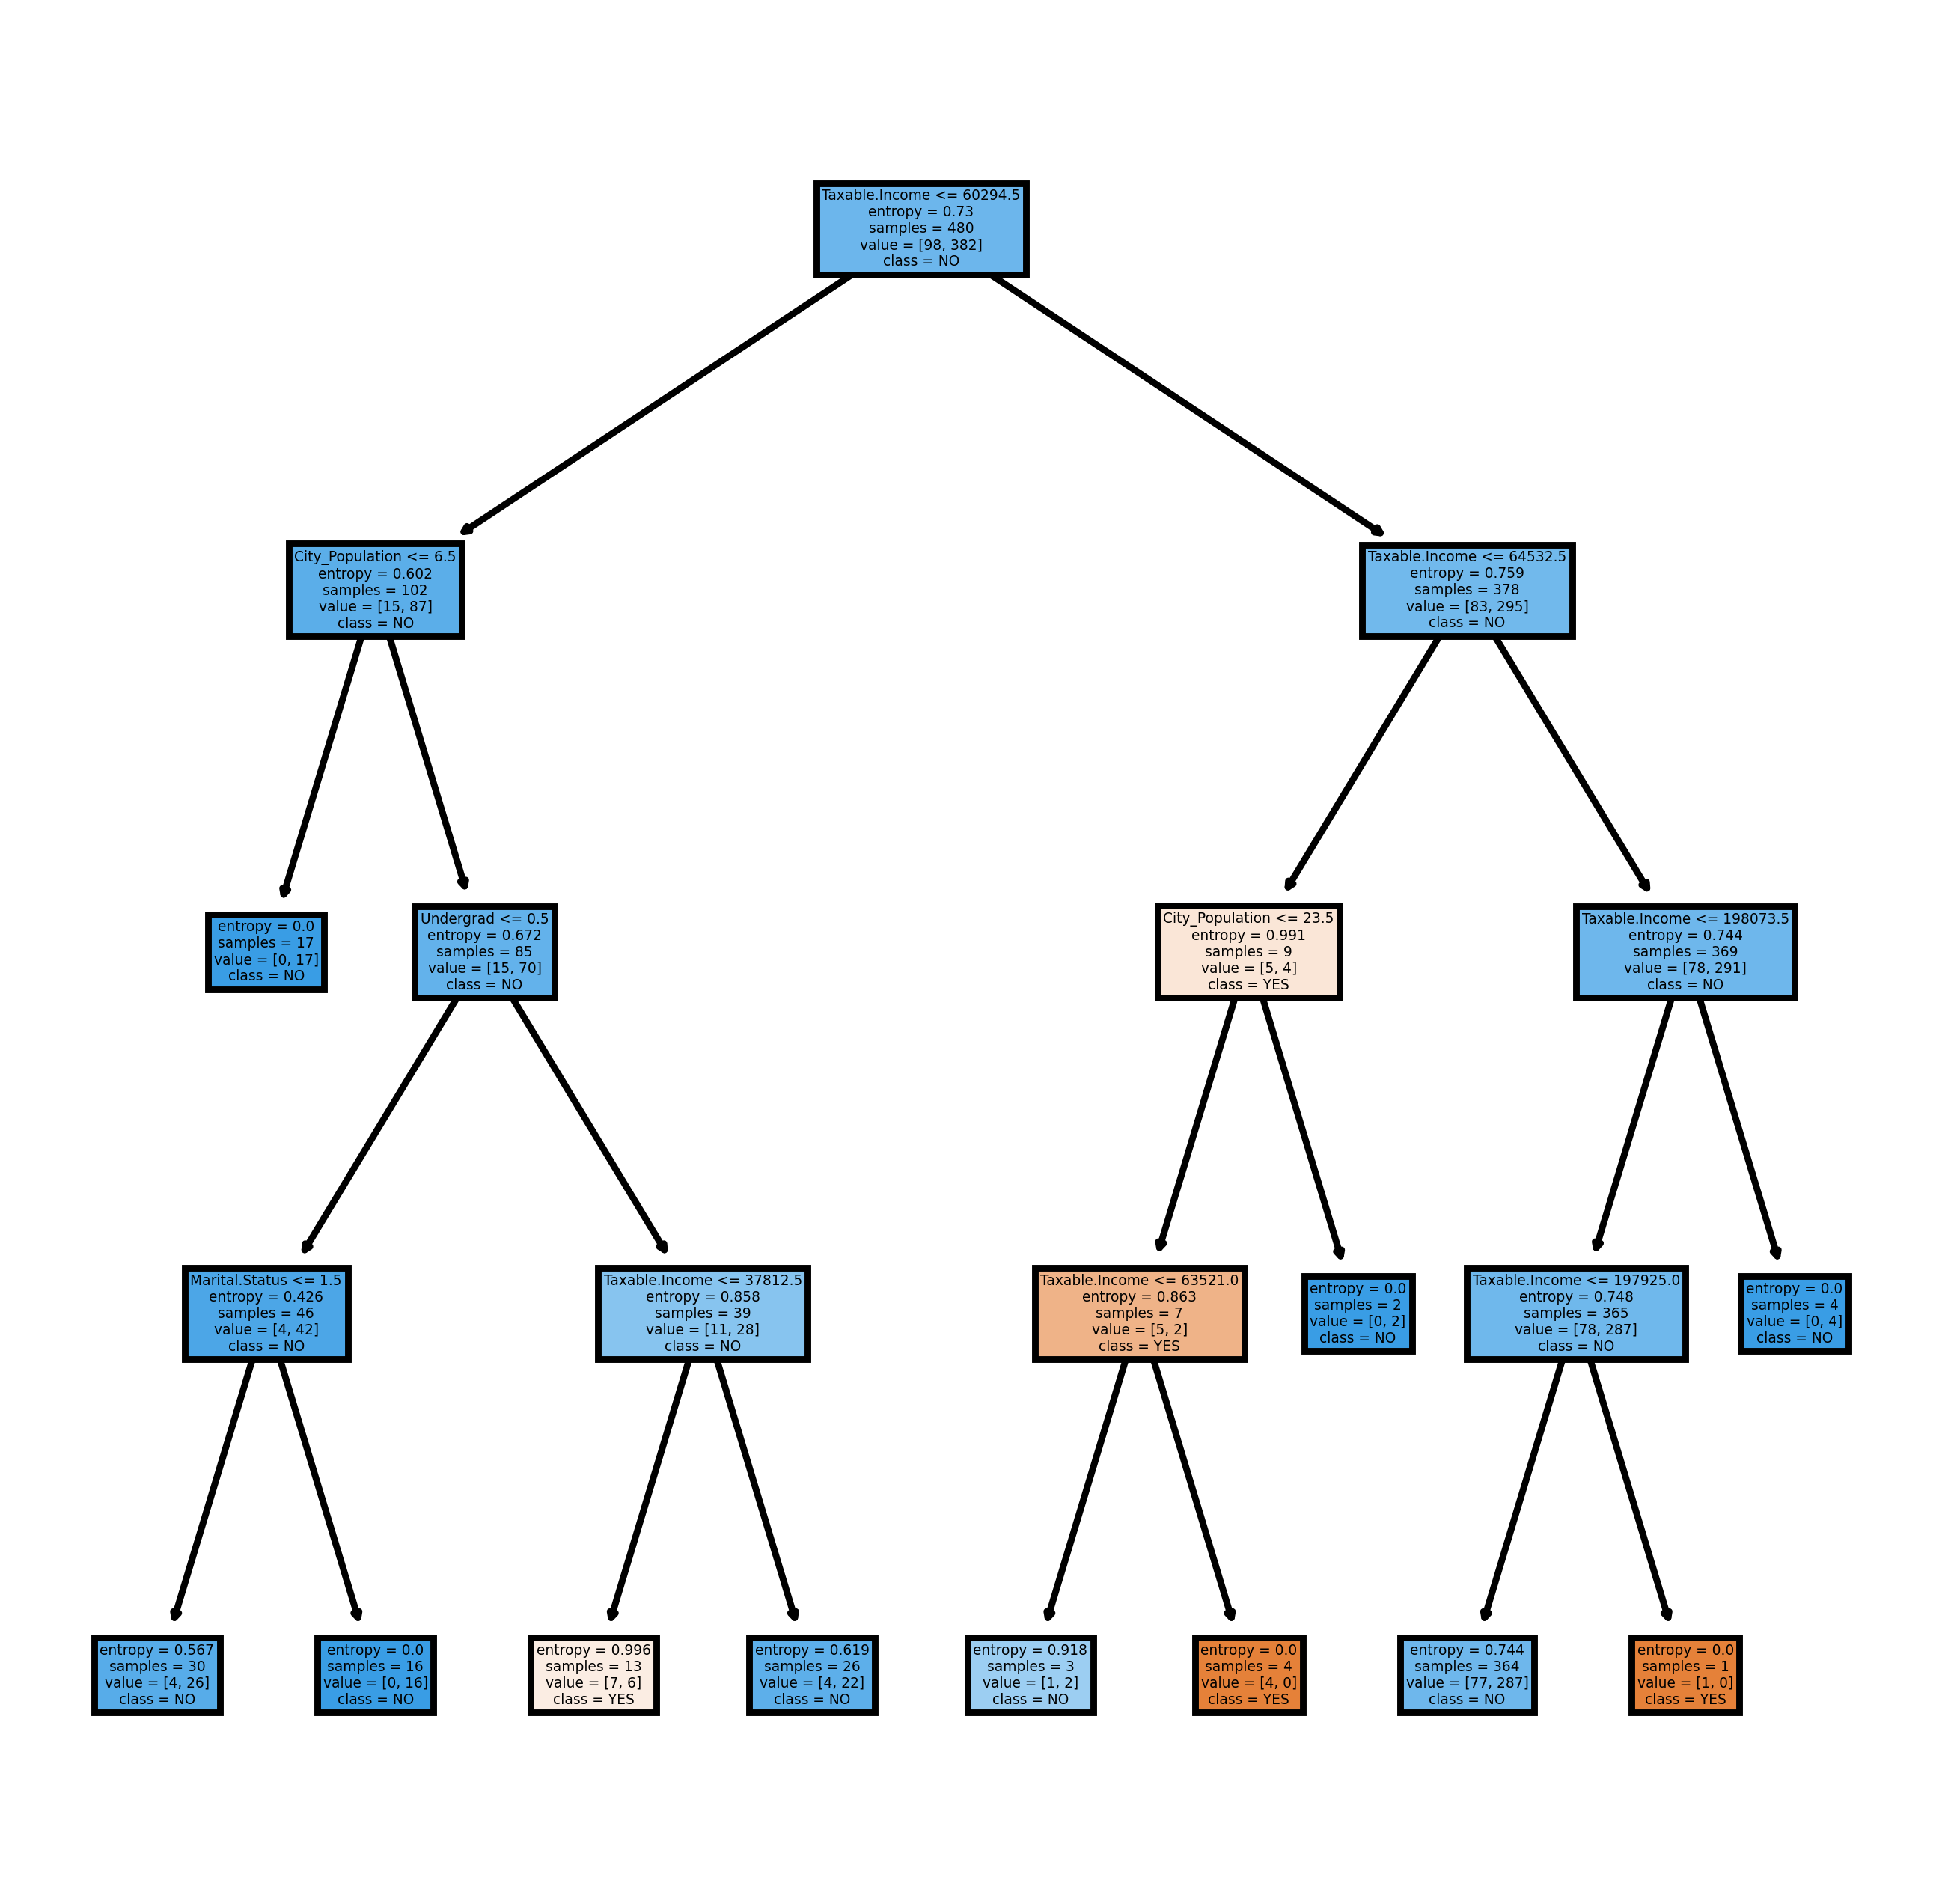

In [17]:
s=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City_Population', 'Work_Experience']
d=['YES','NO']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=640)
tree.plot_tree(model, feature_names = s, class_names = d, filled=True);

### feature extraction

In [18]:
model.feature_importances_

array([0.13239336, 0.08499237, 0.5488907 , 0.23372356, 0.        ])

In [19]:
feature_imp = pd.Series(model.feature_importances_,index=s).sort_values(ascending=False) 
feature_imp

Taxable.Income     0.548891
City_Population    0.233724
Undergrad          0.132393
Marital.Status     0.084992
Work_Experience    0.000000
dtype: float64

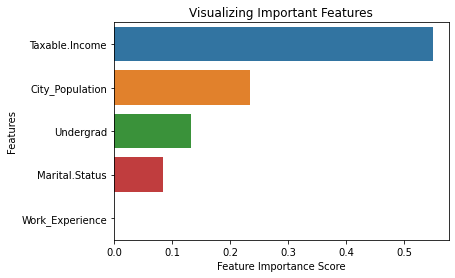

In [20]:
get_ipython().run_line_magic('matplotlib', 'inline')
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [21]:
y_pred= model.predict(x_test) # predicting on test data set 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
pd.Series(y_pred).value_counts() # getting the count of each category

1    116
0      4
dtype: int64

In [23]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Taxable.Income,,
0,0,26
1,4,90


In [24]:
np.mean(y_pred==y_test)

0.75

### Accuracy of the Decesion tree Model for fraud dataset using Entropy is 77.5%.

### Company dataset

In [25]:
# import all required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [26]:
#reading the data
company=pd.read_csv('Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [27]:
#viewing the dtypes
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [28]:
#label encoding the data
label_encoder = preprocessing.LabelEncoder()
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 

In [29]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


In [30]:
# setting feature and target variables 
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']

In [31]:
# splitting the data
x = company[feature_cols]
y = company.High

In [32]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [33]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [34]:
# splitting into train and test data 
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

### building decision tree using Entropy

In [35]:
# Decision using entropy
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

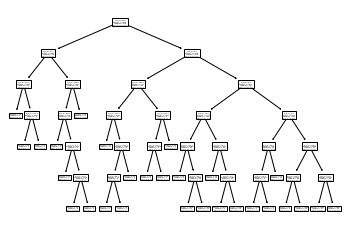

In [36]:
#PLot the decision tree
tree.plot_tree(model);

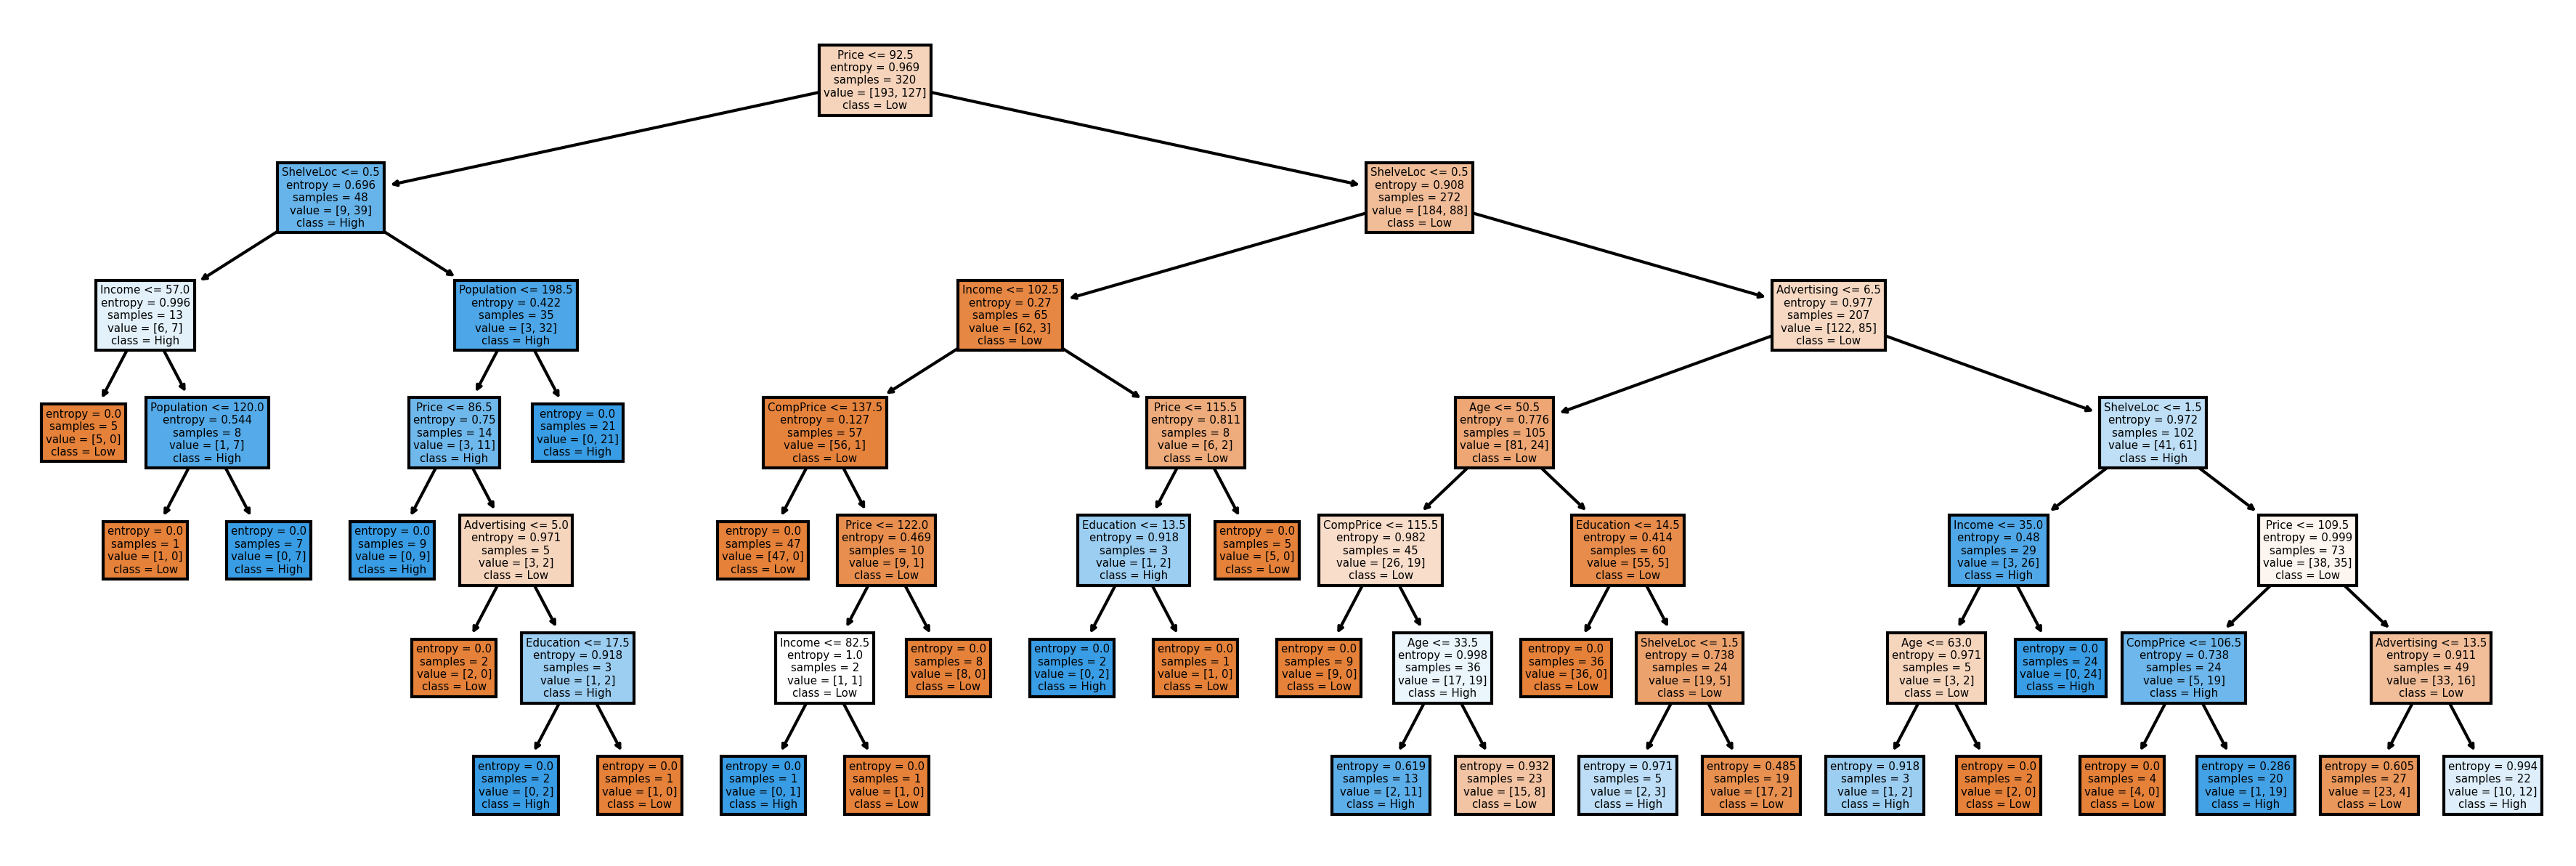

In [37]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 
plt.show()

In [38]:
model.feature_importances_

array([0.10395906, 0.106628  , 0.13722562, 0.03922779, 0.23774668,
       0.22266481, 0.0951453 , 0.05740274, 0.        , 0.        ])

In [39]:
# all importances features in ascending order
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Price          0.237747
ShelveLoc      0.222665
Advertising    0.137226
Income         0.106628
CompPrice      0.103959
Age            0.095145
Education      0.057403
Population     0.039228
US             0.000000
Urban          0.000000
dtype: float64

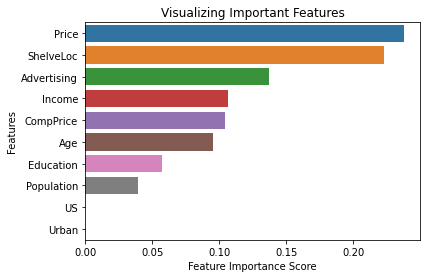

In [40]:
get_ipython().run_line_magic('matplotlib', 'inline')
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [41]:
#predicting the data
y_pred = model.predict(x_test) 

In [42]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [44]:
#getting the count of each category
pd.Series(y_pred).value_counts()

0    54
1    26
dtype: int64

In [45]:
pd.crosstab(y_test,y_pred)

col_0,0,1
High,,
0,37,6
1,17,20


In [47]:
# Accuracy
np.mean(y_pred==y_test)

0.7125

### Accuracy of the Decesion tree Model for Company dataset using Entropy is 100%

### bulding a model using gini criteria

In [48]:
#  Descision tree classifier using gini criteria

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [49]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [50]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

0.7125

### Accuracy of the Decesion tree Model for Company dataset using gini is 100%.